In [52]:
#libraries
import pandas as pd #датафреймы
import numpy as np #массивы, линейная алгебра
import pylab as pl #графики
import math
import matplotlib as mpl #графики
%matplotlib inline
%pylab inline
import datetime
import seaborn as sns #красивые графики!
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [53]:
#scripts
#read date
def prepare_data(path):
    df=pd.read_csv(path, index_col=False, header =0)
    df.Second=df.Second.astype(int)
    for i in df.loc[df.Second==60].index:
        df.loc[i,'Second']=59
    df.string=df.Year.astype(str) + '-' + df.Month.astype(str) + '-' + df.Day.astype(str) + \
        ' ' + df.Hour.astype(str) + ':' + df.Minute.astype(str) + ':' + df.Second.astype(str)
    df['Date']=pd.to_datetime(df.string)
    df.sort_values('Date', inplace = True)
    df = df.reset_index()
    del df['index']
    df['t']=df['Date'].diff().fillna(0)
    df['delta'] = [x.total_seconds() for x in df['t']]
#     df['logtime']=df.t / np.timedelta64(1, 's')
#     for i in df.loc[df.logtime==0].index:
#         df.loc[i,'logtime']=1.0
#     df.logtime=df.logtime.apply(lambda x: math.log(x))
    df = df[1000:]
    df = df.reset_index()
    del df['index']
    return df

In [54]:
df = prepare_data('Japan_sh_regional.csv')

Кросс-корреляционная функция рядов магнитуды и промежутков времени, на графиках абсцисса -- сдвиг.
$correlation\_function[i] = \sum_{j} depth[j]*\Delta t [i+j]$

Для полных рядов (первые 1000 событий уже обрезаны):

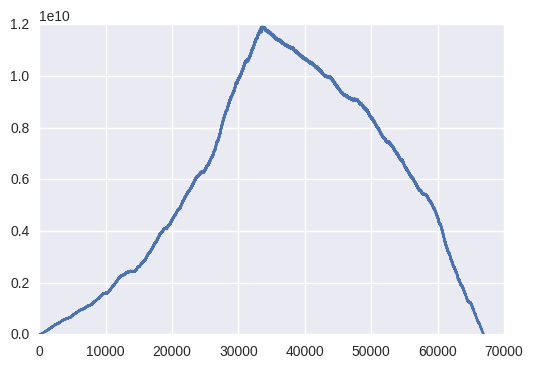

In [55]:
correlation_function = np.correlate(df['Magnitude'],df['delta'], "full")
plot(correlation_function)

In [56]:
df1 = df[:len(df)/2]
df2 = df[len(df)/2:]

Для первой половины рядов:

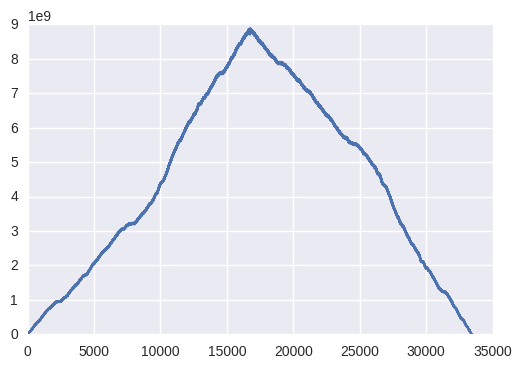

In [57]:
correlation_function = np.correlate(df1['Magnitude'],df1['delta'], "full")
plot(correlation_function)

Для второй половины рядов:

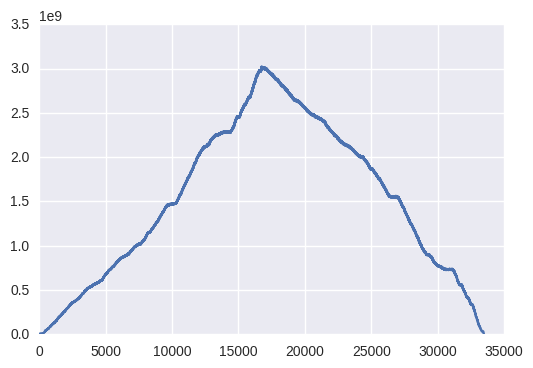

In [58]:
correlation_function = np.correlate(df2['Magnitude'],df2['delta'], "full")
plot(correlation_function)